In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales_db = pd.read_csv('../INEGI_DB/Sales Database.csv')
sales_db = sales_db.rename(columns={'ANIO':'Year','ID_MES':'Month',
                                   'MARCA':'Brand','UNI_VEH':'Units'})
sales_db

,PROD_EST,COBERTURA,Year,Month,Brand,MODELO,TIPO,SEGMENTO,ORIGEN,ID_PAIS_ORIGEN,Units,ds
0,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Mdx,Camiones ligeros,SUV's,IMPORTADO,40,29,2009-01
1,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Rdx,Camiones ligeros,SUV's,IMPORTADO,66,34,2009-01
2,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Rl,Automóviles,De Lujo,IMPORTADO,126,2,2009-01
3,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,Tl 3.5l,Automóviles,De Lujo,IMPORTADO,66,35,2009-01
4,Registro Administrativo de la Industria Automo...,Nacional,2009,1,Acura,TSX 2.4L,Automóviles,De Lujo,IMPORTADO,40,49,2009-01
...,...,...,...,...,...,...,...,...,...,...,...,...
54266,Registro Administrativo de la Industria Automo...,Nacional,2020,12,Volkswagen,Volkswagen Caddy,Camiones ligeros,Pick Ups,IMPORTADO,177,297,2020-12
54267,Registro Administrativo de la Industria Automo...,Nacional,2020,12,Volvo,S60 III,Automóviles,De Lujo,IMPORTADO,66,38,2020-12
54268,Registro Administrativo de la Industria Automo...,Nacional,2020,12,Volvo,XC40,Automóviles,De Lujo,IMPORTADO,23,197,2020-12
54269,Registro Administrativo de la Industria Automo...,Nacional,2020,12,Volvo,XC60 II,Camiones ligeros,SUV's,IMPORTADO,209,59,2020-12


In [3]:
sales_dbc = sales_db[['Year','Month','Brand','Units']]
sales_dbc = sales_dbc.groupby(['Year','Month']).sum()
sales_dbc

Units
Year Month        
2009 1       69664
     2       61579
     3       64242
     4       51395
     5       53440
...            ...
2020 8       77120
     9       77808
     10      84331
     11      95485
     12     105135

[144 rows x 1 columns]

<IPython.core.display.Javascript object>


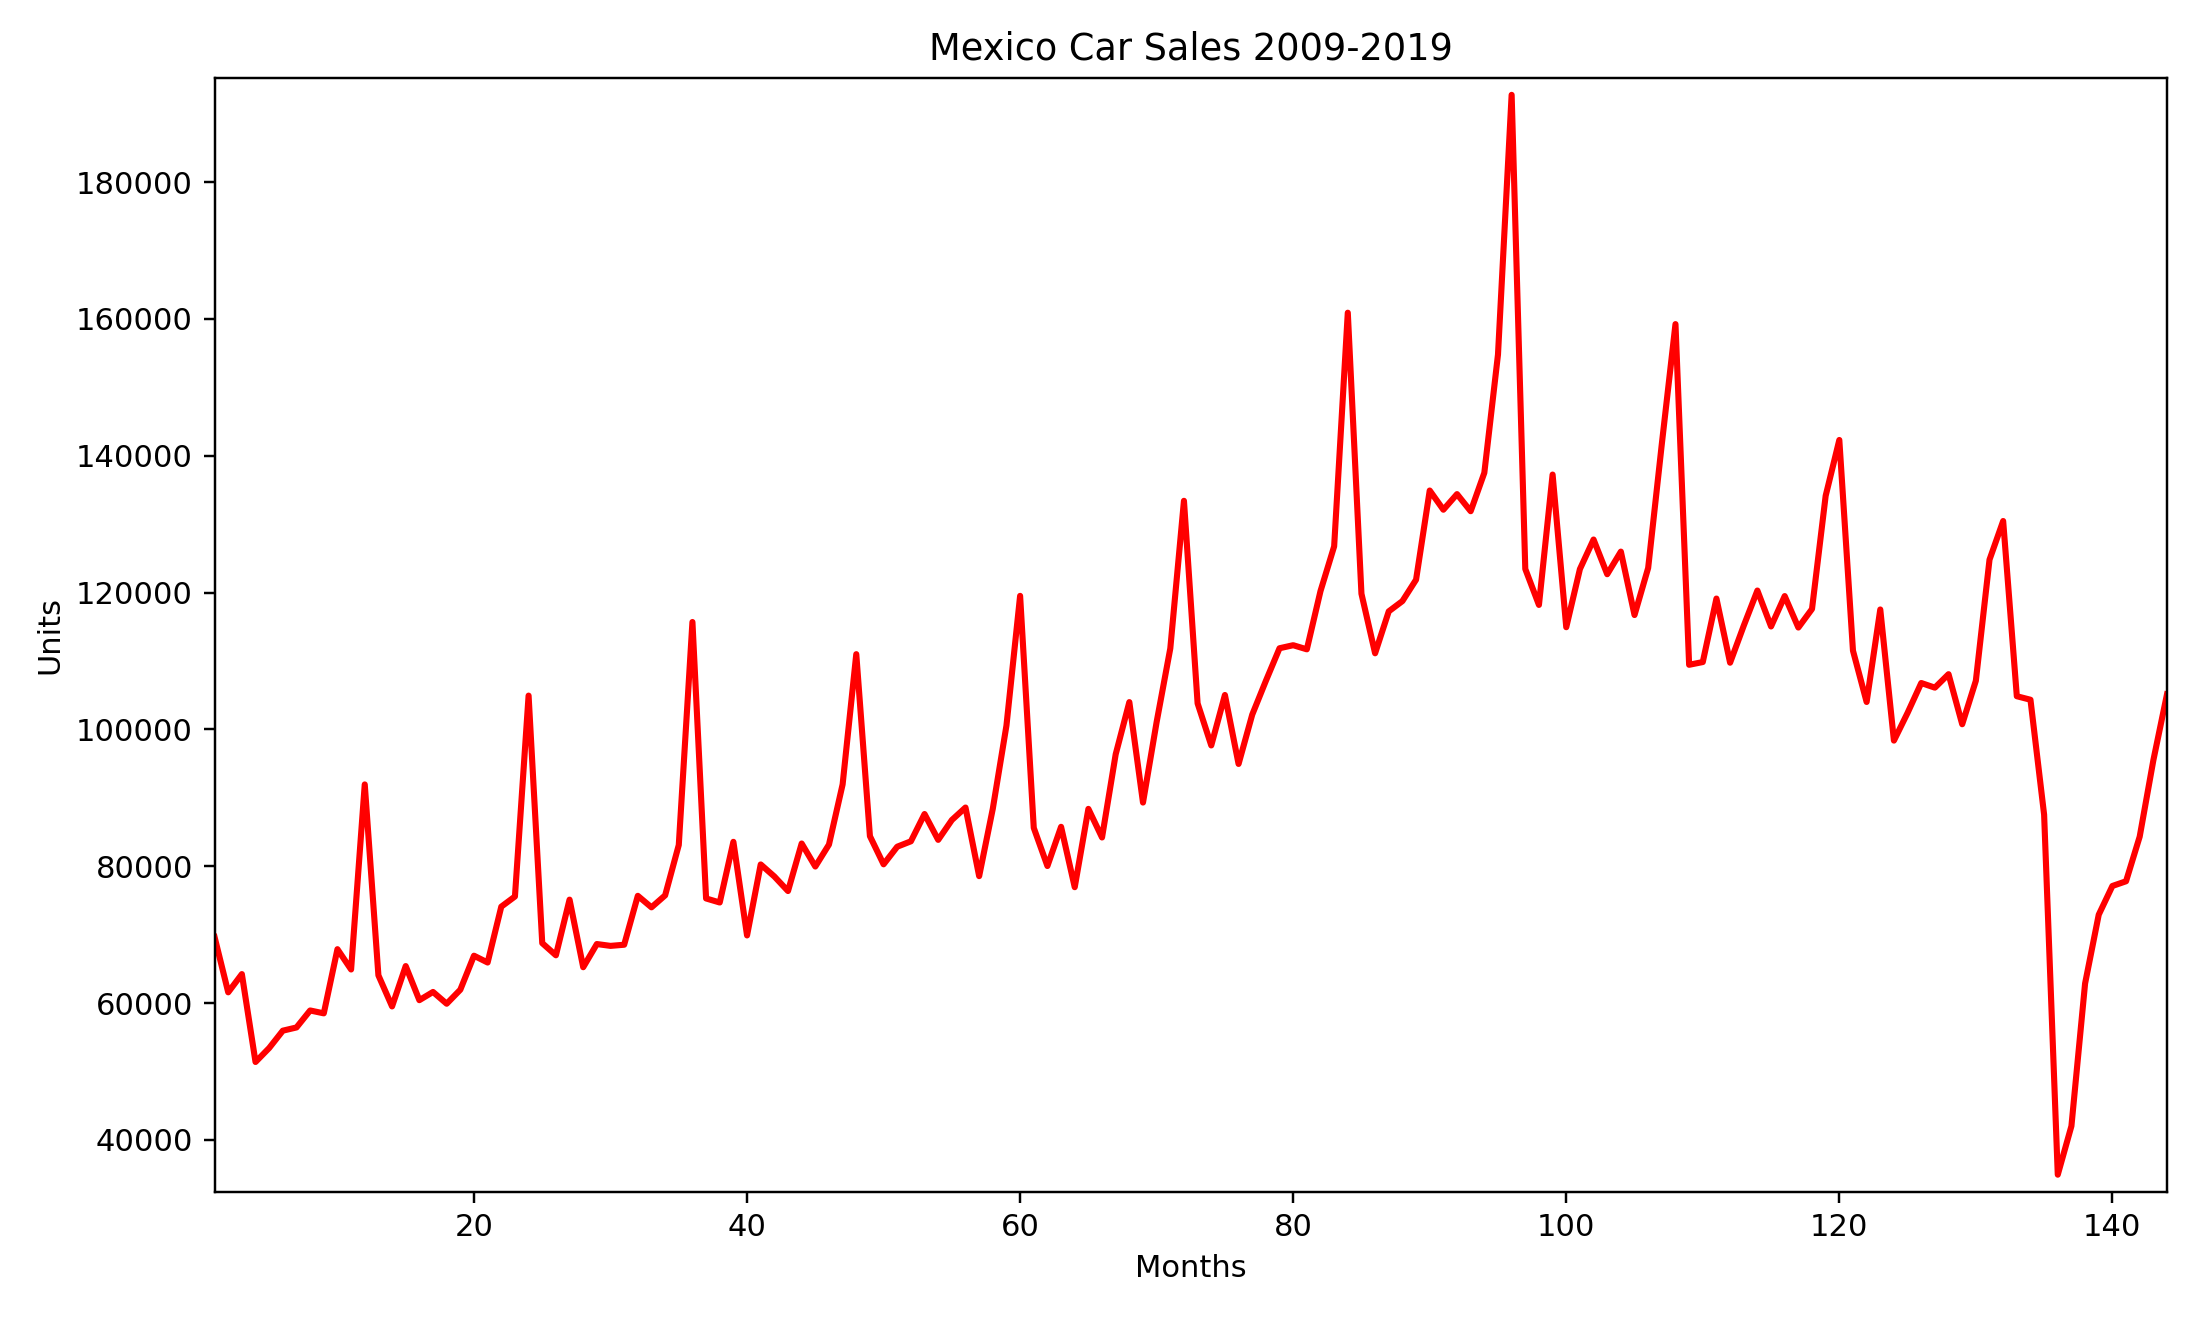

In [4]:
x_axis = [i for i in range(1,len(sales_dbc['Units']) + 1)]
y_axis = sales_dbc['Units'].tolist()
plt.figure(figsize=(10,6))
plt.plot(x_axis, y_axis, color='red', linewidth=2, label='Car sales')
plt.title('Mexico Car Sales 2009-2019')
plt.xlabel('Months')
plt.ylabel('Units')
plt.xlim(1,max(x_axis))
plt.ylim(min(y_axis) - 2500,max(y_axis) + 2500)
plt.tight_layout()
plt.show
plt.savefig('../Graphs/20210210_MVCM_Car Sales Line Plot 2009-2019.png')

In [5]:
sales_dbc['t'] = ""
sales_dbc = sales_dbc[['t','Units']]
sales_dbc
sales_dbc.to_excel('../INEGI_DB/20210210_MVCM_Car sales report 2009-2019.xlsx')